In [1]:
from encodeinteger import encodeInteger
from decodesip import decodeSip
from embed_key import EmbedPermutation
from extract_sip import ExtractPermutation
from recossip import recsip
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
import re

using opencv version:  4.5.5
using opencv version:  4.5.5


In [2]:
# Define watermak number you want to embed to the image

In [3]:
w = 5

In [4]:
# Now encode it to Self-Inverting Permutation
# SiP is the watermark to be embeded

In [5]:
sip = encodeInteger(w)
sip_length = len(sip)

In [6]:
sip

[4, 6, 7, 1, 5, 2, 3]

In [7]:
# Choose an image

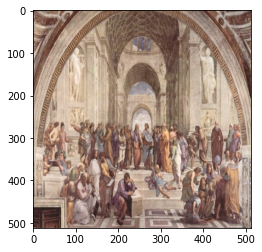

In [8]:
host_image = "painting.jpg"
host_image_name = re.split(r'\.(?!\d)', host_image)[0]
im_to_show = np.array(Image.open(host_image))
plt.imshow(im_to_show)
plt.show()

In [9]:
# Initialize embed algorithm object

In [10]:
em_obj = EmbedPermutation()

In [11]:
# Emped SiP to host image
# choose an apropriate c_opt value
# we going to use c_opt = 5.5

In [12]:
watermaked_image = em_obj.getWatermarkedImage(host_image,sip,sip_length,host_image_name,5.5,2,2)

In [13]:
# Lets see the watermaked image

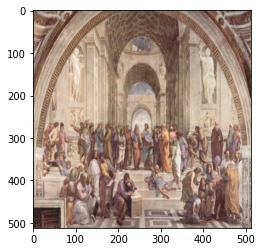

In [14]:
plt.imshow(watermaked_image)
plt.show()

In [15]:
# Now we gonna extract the watermark from the above image
# First lets initialize the extraction object

In [16]:
ex_obj = ExtractPermutation()

In [17]:
# From each image channel (R, G, B) we must get the SiP we embeded

In [18]:
watermarked_image = "watermarked_" + host_image_name + ".jpg"
sip1,sip2,sip3 = ex_obj.getSip(watermarked_image,sip_length,2,2)

In [19]:
# Lets see the SiP's from each channel

In [20]:
sip1

[4, 6, 7, 1, 5, 2, 3]

In [21]:
sip2

[4, 6, 7, 1, 7, 2, 3]

In [22]:
sip3

[4, 6, 7, 1, 5, 2, 3]

In [23]:
# We can see that sip2 is not correct
# We can use the recostruction algorithm
# that utilizes SiP properties or
# we can increase c_opt value
# Bellow we will demostrate the recostruction algorithm

In [24]:
rec_sip2 = recsip(sip2,sip,w,0)

In [25]:
rec_sip2

[4, 6, 7, 1, 5, 2, 3]

In [26]:
# Yuuupyyy we got the correct SiP

In [27]:
# Lets see some metrics between original image and watermarked

In [28]:
# PSNR give's use the distortion in Decibels (dB) of watermarked image
# values above 20dB are consider acceptable

In [29]:
from math import log10, sqrt

In [30]:
def PSNR(original,watermarked):
    mse = np.mean((original - watermarked) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [31]:
watermarked = np.array(Image.open(watermarked_image))
original = np.array(Image.open(host_image))
psnr = PSNR(original,watermarked)

In [32]:
psnr

31.532945946089015

In [33]:
# SSIM give's use as percentage how close in Contrast,Luminance and Structure
# are two images
# A good percentage is above 80%

In [34]:
from skimage.metrics import structural_similarity as ssim

In [35]:
def ssim_metric(img1,img2):
    value = ssim(img1, img2, data_range=img2.max() - img2.min(),multichannel=True)
    return value

In [36]:
ssim_m = ssim_metric(original,watermarked)

C:\Users\vasil\AppData\Local\Temp\ipykernel_17804\2780215235.py:2: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  value = ssim(img1, img2, data_range=img2.max() - img2.min(),multichannel=True)


In [37]:
ssim_m

0.8494680706428848